<h1 align="center">THE SMS SPAM COLLECTION</h1>
<h2 align="center">NTLK</h2>
<h2 align="center">LOGISTIC REGRESSION</h2>
<h2 align="center">NAIVE BAYES CLASSIFIER</h2>

###  The SMS Spam Collection is a set of SMS tagged messages that have been collected from SMS Spam research database. 

### Use this dataset to build a prediction model as follows that will accurately classify which texts are spam? 

### 1. Use NLTK to remove the punctuations and stop words from the messages and Covert to Word2Vec. 

In [1]:
import pandas as pd

In [3]:
#read the dataset
spam = pd.read_csv('spamhamtrain.csv')

In [33]:
spam.head()

,Category,Message
0,ham,"K I'm leaving soon, be there a little after 9"
1,ham,No. Yes please. Been swimming?
2,ham,It took Mr owl 3 licks
3,ham,Its going good...no problem..but still need li...
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...


In [23]:
spam.tail()

,Category,Message
4452,ham,K:)k:)good:)study well.
4453,ham,"Chinatown got porridge, claypot rice, yam cake..."
4454,ham,"Hmm... Dunno leh, mayb a bag 4 goigng out dat ..."
4455,ham,Tell me whos this pls:-)
4456,ham,You are gorgeous! keep those pix cumming :) th...


In [38]:
# What punctuation is included in the default list?
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
# Define a function to remove punctuation in our messages
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text

spam['message_clean'] = spam['Message'].apply(lambda x: remove_punct(x))

spam.head()

,Category,Message,message_clean
0,ham,"K I'm leaving soon, be there a little after 9",K Im leaving soon be there a little after 9
1,ham,No. Yes please. Been swimming?,No Yes please Been swimming
2,ham,It took Mr owl 3 licks,It took Mr owl 3 licks
3,ham,Its going good...no problem..but still need li...,Its going goodno problembut still need little ...
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...,K I yan jiu liao Sat we can go 4 bugis vill on...


In [40]:
# Define a function to split our sentences into a list of words
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

spam['text_tokenized'] = spam['message_clean'].apply(lambda x: tokenize(x.lower()))

spam.head()

,Category,Message,message_clean,text_tokenized
0,ham,"K I'm leaving soon, be there a little after 9",K Im leaving soon be there a little after 9,"[k, im, leaving, soon, be, there, a, little, a..."
1,ham,No. Yes please. Been swimming?,No Yes please Been swimming,"[no, yes, please, been, swimming]"
2,ham,It took Mr owl 3 licks,It took Mr owl 3 licks,"[it, took, mr, owl, 3, licks]"
3,ham,Its going good...no problem..but still need li...,Its going goodno problembut still need little ...,"[its, going, goodno, problembut, still, need, ..."
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...,K I yan jiu liao Sat we can go 4 bugis vill on...,"[k, i, yan, jiu, liao, sat, we, can, go, 4, bu..."


In [41]:
# Load the list of stopwords built into nltk
import nltk

stopwords = nltk.corpus.stopwords.words('english')

In [42]:
# Define a function to remove all stopwords
def remove_stopwords(tokenized_text):    
    text = [word for word in tokenized_text if word not in stopwords]
    return text

spam['text_nostop'] = spam['text_tokenized'].apply(lambda x: remove_stopwords(x))

spam.head()

,Category,Message,message_clean,text_tokenized,text_nostop
0,ham,"K I'm leaving soon, be there a little after 9",K Im leaving soon be there a little after 9,"[k, im, leaving, soon, be, there, a, little, a...","[k, im, leaving, soon, little, 9]"
1,ham,No. Yes please. Been swimming?,No Yes please Been swimming,"[no, yes, please, been, swimming]","[yes, please, swimming]"
2,ham,It took Mr owl 3 licks,It took Mr owl 3 licks,"[it, took, mr, owl, 3, licks]","[took, mr, owl, 3, licks]"
3,ham,Its going good...no problem..but still need li...,Its going goodno problembut still need little ...,"[its, going, goodno, problembut, still, need, ...","[going, goodno, problembut, still, need, littl..."
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...,K I yan jiu liao Sat we can go 4 bugis vill on...,"[k, i, yan, jiu, liao, sat, we, can, go, 4, bu...","[k, yan, jiu, liao, sat, go, 4, bugis, vill, o..."


In [43]:
# Read in the data and clean up column names
import gensim
import numpy as np
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 100)

In [44]:
spam = spam.drop(labels = ["Message", "message_clean", "text_tokenized"], axis = 1)
spam.columns = ["label", "text"]
spam.head()

,label,text
0,ham,"[k, im, leaving, soon, little, 9]"
1,ham,"[yes, please, swimming]"
2,ham,"[took, mr, owl, 3, licks]"
3,ham,"[going, goodno, problembut, still, need, little, experience, understand, american, customer, voice]"
4,ham,"[k, yan, jiu, liao, sat, go, 4, bugis, vill, one, frm, 10, 3, den, hop, parco, 4, nb, sun, go, c..."


In [45]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(spam['text'],
                                                    spam['label'], test_size=0.2)

### The word2vec model

In [46]:
# Train the word2vec model
w2v_model = gensim.models.Word2Vec(X_train,
                                   size=100,
                                   window=5,
                                   min_count=2)

In [47]:
# Generate a list of words the word2vec model learned word vectors for
w2v_model.wv.index2word

['u',
 'call',
 '2',
 'im',
 'get',
 'ur',
 'ltgt',
 'go',
 '4',
 'dont',
 'ok',
 'free',
 'got',
 'ill',
 'know',
 'like',
 '',
 'come',
 'good',
 'time',
 'day',
 'love',
 'send',
 'want',
 'need',
 'ü',
 'see',
 'text',
 'lor',
 'going',
 'stop',
 'txt',
 'sorry',
 'one',
 'still',
 'back',
 'home',
 'r',
 'hi',
 'well',
 'take',
 'n',
 'new',
 'cant',
 'today',
 'reply',
 'night',
 'da',
 'mobile',
 'great',
 'tell',
 'week',
 'think',
 'happy',
 'phone',
 'later',
 'pls',
 'hey',
 'please',
 'much',
 'give',
 'oh',
 'way',
 'ask',
 'work',
 'claim',
 'make',
 'hope',
 'dear',
 'wat',
 'msg',
 'say',
 'said',
 'thats',
 'prize',
 'already',
 'tomorrow',
 'number',
 'nokia',
 'meet',
 'didnt',
 'babe',
 'morning',
 'message',
 'amp',
 'yeah',
 'sure',
 'right',
 'really',
 '1',
 'anything',
 'cos',
 'ive',
 'every',
 'last',
 'pick',
 'soon',
 'also',
 'c',
 'yes',
 'find',
 'care',
 'e',
 'life',
 'miss',
 'even',
 'would',
 'keep',
 'thanks',
 '3',
 'k',
 'b',
 'win',
 'feel',
 'm

In [48]:
# Generate aggregated sentence vectors based on the word vectors for each word in the sentence
w2v_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in w2v_model.wv.index2word])
                     for ls in X_test])

/opt/anaconda3/envs/datamining/lib/python3.6/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
for i, v in enumerate(w2v_vect):
    print(len(X_test.iloc[i]), len(v))

8 5
10 9
6 5
12 11
7 5
2 2
7 6
4 4
7 6
12 10
2 1
10 6
6 5
6 5
6 6
18 18
4 4
14 10
5 5
20 17
6 6
6 6
18 16
2 2
8 7
5 3
11 10
6 6
3 3
14 11
10 9
8 6
2 2
17 14
2 2
4 4
16 13
10 10
4 4
9 4
12 11
5 4
11 9
18 9
3 3
14 12
11 11
15 10
17 16
9 4
16 15
4 4
21 13
20 13
3 3
9 8
15 15
2 1
7 6
3 3
4 4
19 18
8 7
3 3
6 4
4 2
17 15
11 11
10 9
3 3
17 15
9 8
3 3
14 13
9 9
9 7
7 6
16 15
4 3
1 1
10 9
13 9
3 3
6 5
16 16
4 4
6 4
4 2
10 8
15 14
15 14
3 3
2 2
7 6
5 3
3 3
13 13
8 4
9 5
4 2
4 3
9 5
29 17
3 3
9 8
7 6
4 4
13 11
3 2
4 3
23 16
6 6
19 19
7 7
7 2
11 8
13 13
6 5
20 13
10 9
3 3
2 2
14 13
8 5
6 6
4 3
7 5
7 7
16 15
4 4
8 7
4 3
9 7
3 3
3 3
23 19
3 3
6 6
4 4
1 1
10 8
15 11
5 3
10 4
14 10
15 12
23 20
8 8
4 2
8 7
7 7
4 3
8 8
12 12
3 2
3 2
5 5
15 8
20 16
17 15
5 5
16 15
17 14
10 10
3 3
6 6
6 5
9 9
3 2
5 5
11 11
4 4
1 1
23 20
3 2
3 2
1 1
18 15
3 2
5 4
4 4
14 13
5 5
10 8
13 7
20 15
6 2
38 20
3 3
8 6
12 10
1 1
7 7
11 9
5 4
19 13
7 5
9 8
5 4
20 15
4 4
4 3
6 5
4 3
7 6
2 2
5 3
10 6
11 8
23 4
5 3
12 11
17 12
6 6
19 1

In [50]:
# Compute sentence vectors 
w2v_vect_avg = []

for vect in w2v_vect:
    if len(vect)!=0:
        w2v_vect_avg.append(vect.mean(axis=0))
    else:
        w2v_vect_avg.append(np.zeros(100))

In [51]:
for i, v in enumerate(w2v_vect_avg):
    print(len(X_test.iloc[i]), len(v))

8 100
10 100
6 100
12 100
7 100
2 100
7 100
4 100
7 100
12 100
2 100
10 100
6 100
6 100
6 100
18 100
4 100
14 100
5 100
20 100
6 100
6 100
18 100
2 100
8 100
5 100
11 100
6 100
3 100
14 100
10 100
8 100
2 100
17 100
2 100
4 100
16 100
10 100
4 100
9 100
12 100
5 100
11 100
18 100
3 100
14 100
11 100
15 100
17 100
9 100
16 100
4 100
21 100
20 100
3 100
9 100
15 100
2 100
7 100
3 100
4 100
19 100
8 100
3 100
6 100
4 100
17 100
11 100
10 100
3 100
17 100
9 100
3 100
14 100
9 100
9 100
7 100
16 100
4 100
1 100
10 100
13 100
3 100
6 100
16 100
4 100
6 100
4 100
10 100
15 100
15 100
3 100
2 100
7 100
5 100
3 100
13 100
8 100
9 100
4 100
4 100
9 100
29 100
3 100
9 100
7 100
4 100
13 100
3 100
4 100
23 100
6 100
19 100
7 100
7 100
11 100
13 100
6 100
20 100
10 100
3 100
2 100
14 100
8 100
6 100
4 100
7 100
7 100
16 100
4 100
8 100
4 100
9 100
3 100
3 100
23 100
3 100
6 100
4 100
1 100
10 100
15 100
5 100
10 100
14 100
15 100
23 100
8 100
4 100
8 100
7 100
4 100
8 100
12 100
3 100
3 100
5 100
1

### 2. Use Logistic Regression with L2 Regularisation (using your intelligent choice of Hyperparameters), find the accuracy of SPAM/HAM detection. Compare your result with Naive Bayes Classifier of this same dataset.

### Naive Bayes Classifier

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [144]:
spam_df = pd.read_csv("spamhamtrain.csv")

In [145]:
spam_df.head()

,Category,Message
0,ham,"K I'm leaving soon, be there a little after 9"
1,ham,No. Yes please. Been swimming?
2,ham,It took Mr owl 3 licks
3,ham,Its going good...no problem..but still need little experience to understand american customer vo...
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vill one frm 10 to 3 den hop to parco 4 nb. Sun can ...


In [146]:
spam_df["Category"].value_counts()

ham     3863
spam     594
Name: Category, dtype: int64

In [147]:
Spam = {'spam' : 1, 'ham':0}

In [150]:
spam_data = spam_df.replace(Spam)
spam_data.head()

,Category,Message
0,0,"K I'm leaving soon, be there a little after 9"
1,0,No. Yes please. Been swimming?
2,0,It took Mr owl 3 licks
3,0,Its going good...no problem..but still need little experience to understand american customer vo...
4,0,K.. I yan jiu liao... Sat we can go 4 bugis vill one frm 10 to 3 den hop to parco 4 nb. Sun can ...


In [156]:
spam_data.describe()

,Category
count,4457.000000
mean,0.133274
std,0.339908
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [157]:
# Let's see which message is the most popular ham/spam message
spam_data.groupby('Category').describe()

Message         \
           count unique   
Category                  
0           3863   3635   
1            594    522   

                                                                                                               \
                                                                                                          top   
Category                                                                                                        
0                                                                                      Sorry, I'll call later   
1         Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as y...   

               
         freq  
Category       
0          26  
1           4

In [158]:
# Let's get the length of the messages
spam_data['length'] = spam_data['Message'].apply(len)
spam_data.head()

,Category,Message,length
0,0,"K I'm leaving soon, be there a little after 9",45
1,0,No. Yes please. Been swimming?,30
2,0,It took Mr owl 3 licks,22
3,0,Its going good...no problem..but still need little experience to understand american customer vo...,102
4,0,K.. I yan jiu liao... Sat we can go 4 bugis vill one frm 10 to 3 den hop to parco 4 nb. Sun can ...,155


<AxesSubplot:ylabel='Frequency'>

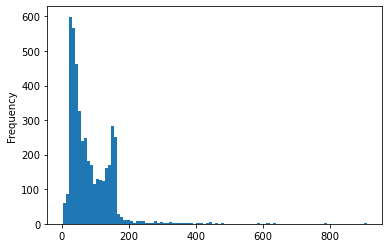

In [159]:
spam_data['length'].plot(bins=100, kind='hist') 

In [160]:
spam_data.length.describe()

count    4457.000000
mean       80.374018
std        60.327453
min         2.000000
25%        35.000000
50%        61.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [161]:
ham = spam_data[spam_data['Category']==0]

In [170]:
spam = spam_data[spam_data['Category']==1]

In [168]:
print( 'Ham percentage =', (len(ham) / len(spam_data) )*100,"%")

Ham percentage = 86.67264976441552 %


In [164]:
ham

,Category,Message,length
0,0,"K I'm leaving soon, be there a little after 9",45
1,0,No. Yes please. Been swimming?,30
2,0,It took Mr owl 3 licks,22
3,0,Its going good...no problem..but still need little experience to understand american customer vo...,102
4,0,K.. I yan jiu liao... Sat we can go 4 bugis vill one frm 10 to 3 den hop to parco 4 nb. Sun can ...,155
5,0,I sent your maga that money yesterday oh.,41
6,0,Does cinema plus drink appeal tomo? * Is a fr thriller by director i like on at mac at 8.30.,92
7,0,"Now, whats your house # again ? And do you have any beer there ?",64
9,0,"Hello baby, did you get back to your mom's ? Are you setting up the computer now ? Filling your ...",157
10,0,When are you going to ride your bike?,37


In [171]:
spam

,Category,Message,length
8,1,Back 2 work 2morro half term over! Can U C me 2nite 4 some sexy passion B4 I have 2 go back? Cha...,159
17,1,PRIVATE! Your 2003 Account Statement for shows 800 un-redeemed S.I.M. points. Call 08718738001 I...,134
21,1,HMV BONUS SPECIAL 500 pounds of genuine HMV vouchers to be won. Just answer 4 easy questions. Pl...,155
26,1,Guess what! Somebody you know secretly fancies you! Wanna find out who it is? Give us a call on ...,156
37,1,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA to No: 89545 & collect yours today!From ONLY £1 w...",142
44,1,Dear 0776xxxxxxx U've been invited to XCHAT. This is our final attempt to contact u! Txt CHAT to...,154
53,1,Enjoy the jamster videosound gold club with your credits for 2 new videosounds+2 logos+musicnews...,162
59,1,"URGENT, IMPORTANT INFORMATION FOR O2 USER. TODAY IS YOUR LUCKY DAY! 2 FIND OUT WHY LOG ONTO HTTP...",163
102,1,Refused a loan? Secured or Unsecured? Can't get credit? Call free now 0800 195 6669 or text back...,114
109,1,IMPORTANT INFORMATION 4 ORANGE USER 0796XXXXXX. TODAY IS UR LUCKY DAY!2 FIND OUT WHY LOG ONTO ht...,157


In [172]:
print( 'Spam percentage =', (len(spam) / len(spam_data) )*100,"%")

Spam percentage = 13.327350235584474 %


/opt/anaconda3/envs/datamining/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Category', ylabel='count'>

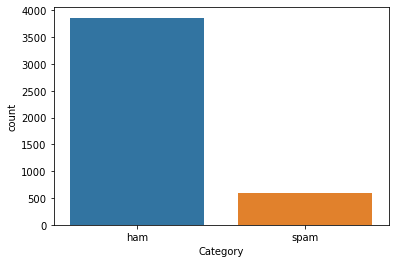

In [175]:
sns.countplot(spam_df['Category'], label = "Count") 

In [179]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_data['Message'])

In [183]:
X1 = spamham_countvectorizer
y1 = spam_data['Category']

In [184]:
X1.shape

(4457, 7718)

In [185]:
y1.shape

(4457,)

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

In [187]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [188]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

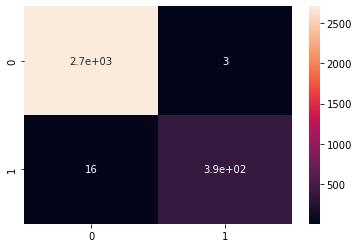

In [189]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [190]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2713
           1       0.99      0.96      0.98       406

    accuracy                           0.99      3119
   macro avg       0.99      0.98      0.99      3119
weighted avg       0.99      0.99      0.99      3119



<AxesSubplot:>

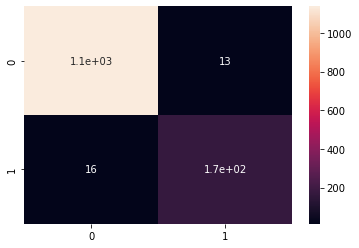

In [191]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [192]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1150
           1       0.93      0.91      0.92       188

    accuracy                           0.98      1338
   macro avg       0.96      0.95      0.95      1338
weighted avg       0.98      0.98      0.98      1338



### Logistic Regression with L2

In [193]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

In [195]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3)

In [197]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(penalty='l2', solver='sag', n_jobs=-1)
logmodel.fit(X_train1,y_train1)
predictions = logmodel.predict(X_test1)

/opt/anaconda3/envs/datamining/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1150
           1       0.15      0.13      0.14       188

    accuracy                           0.78      1338
   macro avg       0.51      0.51      0.51      1338
weighted avg       0.76      0.78      0.77      1338



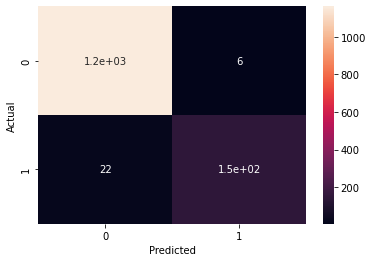

In [198]:
#Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)
conf_matrix = pd.crosstab(y_test1, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)
sum(np.abs(y_test-predictions))
d = {'y_test': y_test, 'y_hat': predictions}

### - Conclusion: We can see the accuracy of Naive Bayes Classifier is higher than the accuracy of logistic regression with L2 Regularisation of same dataset.